<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.
 


In [1]:
# Install tidymodels if you haven't done so
install.packages("rlang")
install.packages("tidymodels")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘sparsevctrs’, ‘cli’, ‘dials’, ‘hardhat’, ‘parsnip’, ‘purrr’, ‘recipes’, ‘tune’, ‘workflows’, ‘yardstick’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [1]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──



### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [9]:
url <- 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'
destfile <- 'noaa-weather-sample-data.tar.gz'
download.file(url, destfile)

Untar the zipped file.


In [17]:
untar(destfile, exdir = '.')

<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [18]:
jfk_weather_data <- read.csv('jfk_weather/noaa-weather-sample-data/jfk_weather_sample.csv')


DATE                 HOURLYDewPointTempF HOURLYRelativeHumidity
1 2015-07-25T13:51:00Z 60                  46                    
2 2016-11-18T23:51:00Z 34                  48                    
3 2013-01-06T08:51:00Z 33                  89                    
4 2011-01-27T16:51:00Z 18                  48                    
5 2015-01-03T12:16:00Z 27                  61                    
6 2013-02-15T20:51:00Z 35                  79                    
  HOURLYDRYBULBTEMPF HOURLYWETBULBTEMPF HOURLYPrecip HOURLYWindSpeed
1 83                 68                 0.00         13             
2 53                 44                 0.00          6             
3 36                 35                 0.00         13             
4 36                 30                 0.00         14             
5 39                 34                 T            11             
6 41                 38                 0.00          6             
  HOURLYSeaLevelPressure HOURLYStationPressure
1 30.01                  29.99                
2 30.05                  30.03                
3 30.14                  30.12                
4 29.82                  29.80                
5    NA                  30.50                
6 29.94                  29.92

Next, display the first few rows of the dataframe.


In [19]:
head(jfk_weather_data)

DATE                 HOURLYDewPointTempF HOURLYRelativeHumidity
1 2015-07-25T13:51:00Z 60                  46                    
2 2016-11-18T23:51:00Z 34                  48                    
3 2013-01-06T08:51:00Z 33                  89                    
4 2011-01-27T16:51:00Z 18                  48                    
5 2015-01-03T12:16:00Z 27                  61                    
6 2013-02-15T20:51:00Z 35                  79                    
  HOURLYDRYBULBTEMPF HOURLYWETBULBTEMPF HOURLYPrecip HOURLYWindSpeed
1 83                 68                 0.00         13             
2 53                 44                 0.00          6             
3 36                 35                 0.00         13             
4 36                 30                 0.00         14             
5 39                 34                 T            11             
6 41                 38                 0.00          6             
  HOURLYSeaLevelPressure HOURLYStationPressure
1 30.01                  29.99                
2 30.05                  30.03                
3 30.14                  30.12                
4 29.82                  29.80                
5    NA                  30.50                
6 29.94                  29.92

Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [20]:
jfk_weather_data %>% glimpse()

Rows: 5,727
Columns: 9
$ DATE                   <chr> "2015-07-25T13:51:00Z", "2016-11-18T23:51:00Z",…
$ HOURLYDewPointTempF    <chr> "60", "34", "33", "18", "27", "35", "4", "14", …
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <int> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [21]:
jfk_subset <- jfk_weather_data %>%
  select(HOURLYRelativeHumidity,
         HOURLYDRYBULBTEMPF,
         HOURLYPrecip,
         HOURLYWindSpeed,
         HOURLYStationPressure)

Show the first 10 rows of this new dataframe.


In [24]:
head(jfk_subset, 10)

HOURLYRelativeHumidity HOURLYDRYBULBTEMPF HOURLYPrecip HOURLYWindSpeed
1  46                     83                 0.00         13             
2  48                     53                 0.00          6             
3  89                     36                 0.00         13             
4  48                     36                 0.00         14             
5  61                     39                 T            11             
6  79                     41                 0.00          6             
7  51                     19                 0.00          0             
8  65                     24                 0.00         11             
9  90                     54                 0.06         11             
10 94                     73                 NA            5             
   HOURLYStationPressure
1  29.99                
2  30.03                
3  30.12                
4  29.80                
5  30.50                
6  29.92                
7  30.40                
8  30.35                
9  30.03                
10 29.91

<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [25]:
unique(jfk_subset$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [33]:
# Remove "s" from the end and replace "T" with "0.0"
jfk_subset_clean <- jfk_subset %>%
  mutate(HOURLYPrecip = str_remove(HOURLYPrecip, pattern = "s$"),  # Remove "s" from the end
         HOURLYPrecip = str_replace_all(HOURLYPrecip, "T", "0.0"),  # Replace "T" with "0.0"
         HOURLYPrecip = as.numeric(HOURLYPrecip))  # Convert to numeric

# Step 2: Remove rows with NA values in HOURLYPrecip
jfk_subset_clean <- jfk_subset_clean %>%
  filter(!is.na(HOURLYPrecip))  # Remove rows where HOURLYPrecip is NA


<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [35]:
glimpse(jfk_subset_clean)

Rows: 4,054
Columns: 5
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 1…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [41]:
jfk_subset_clean <- jfk_subset_clean %>%
  filter(!is.na(HOURLYPrecip))

# Check unique values again to confirm
unique(jfk_subset_clean$HOURLYPrecip)

[1] 0.00 0.06 0.03 0.02 0.08 0.01 0.07 0.16 0.09 0.22 0.24 0.18 0.05 0.04 0.11
[16] 0.14 0.25 0.10 0.58 0.12 0.13 0.46 1.07 1.19 0.34 0.20 0.42 0.17 0.27 0.35
[31] 0.31 0.33 0.23 0.26 0.28 0.75 0.19 0.36 0.54 0.59 0.21

We can now see that all fields have numerical data type.


In [44]:
summary(jfk_subset_clean$HOURLYPrecip)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.006399 0.000000 1.190000 

<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [45]:
# Rename columns using dplyr::rename
jfk_subset_clean_final <- jfk_subset_clean %>%
  rename(
    relative_humidity = HOURLYRelativeHumidity,
    dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
    precip = HOURLYPrecip,
    wind_speed = HOURLYWindSpeed,
    station_pressure = HOURLYStationPressure
  )

# Check the column names to confirm
colnames(jfk_subset_clean_final)

[1] "relative_humidity" "dry_bulb_temp_f"   "precip"           
[4] "wind_speed"        "station_pressure"

<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [46]:
# Load the rsample package
library(rsample)

# Set seed for reproducibility
set.seed(1234)

# Split the data into training (80%) and testing (20%)
split_data <- initial_split(jfk_subset_clean_final, prop = 0.8)

# Create training and testing sets
train_data <- training(split_data)
test_data <- testing(split_data)

# Check the number of rows in each set
nrow(train_data)  # Should be 80% of the total data
nrow(test_data)   # Should be 20% of the total data

[1] 3243

[1] 811

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


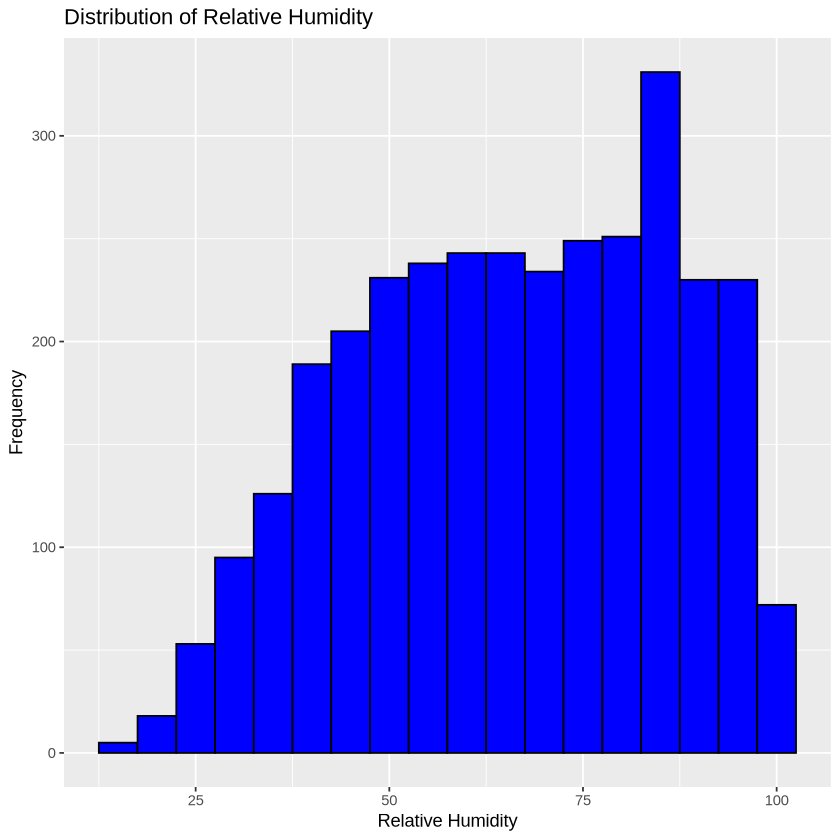

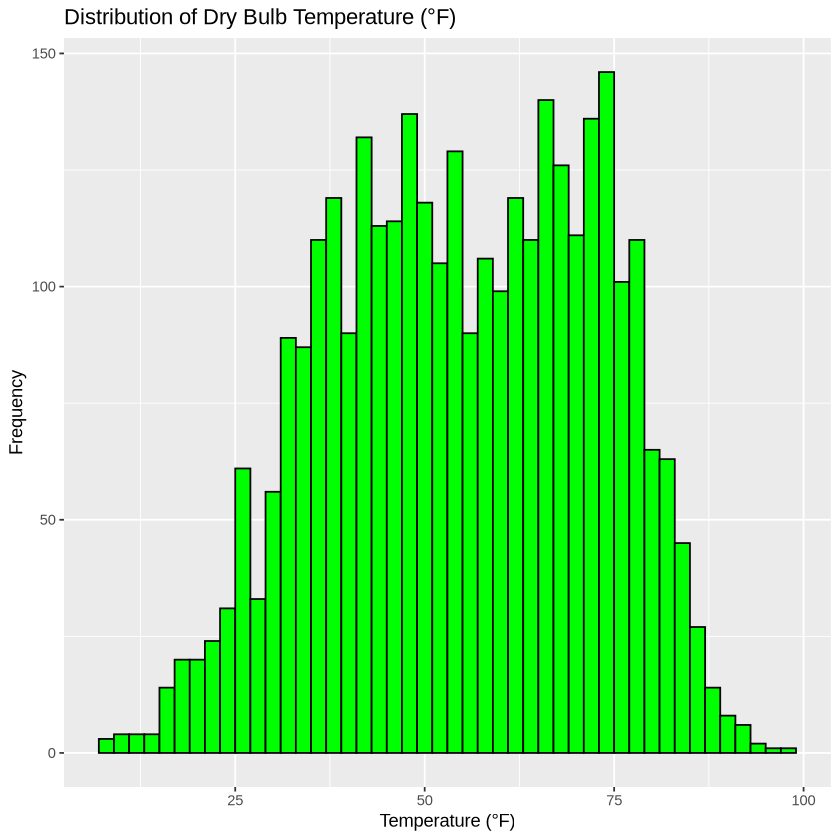

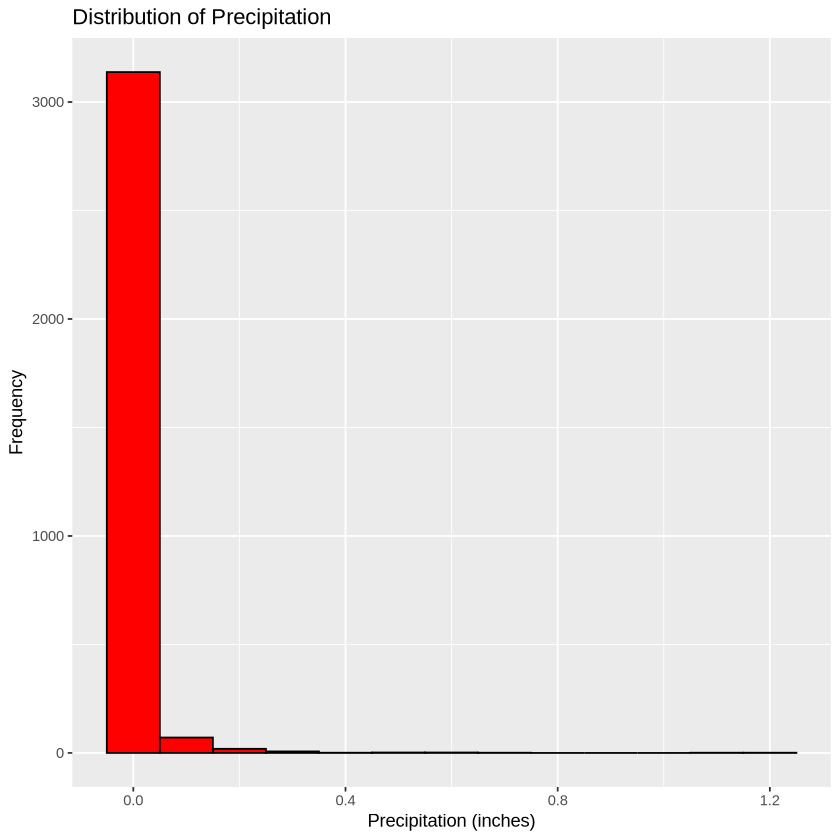

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


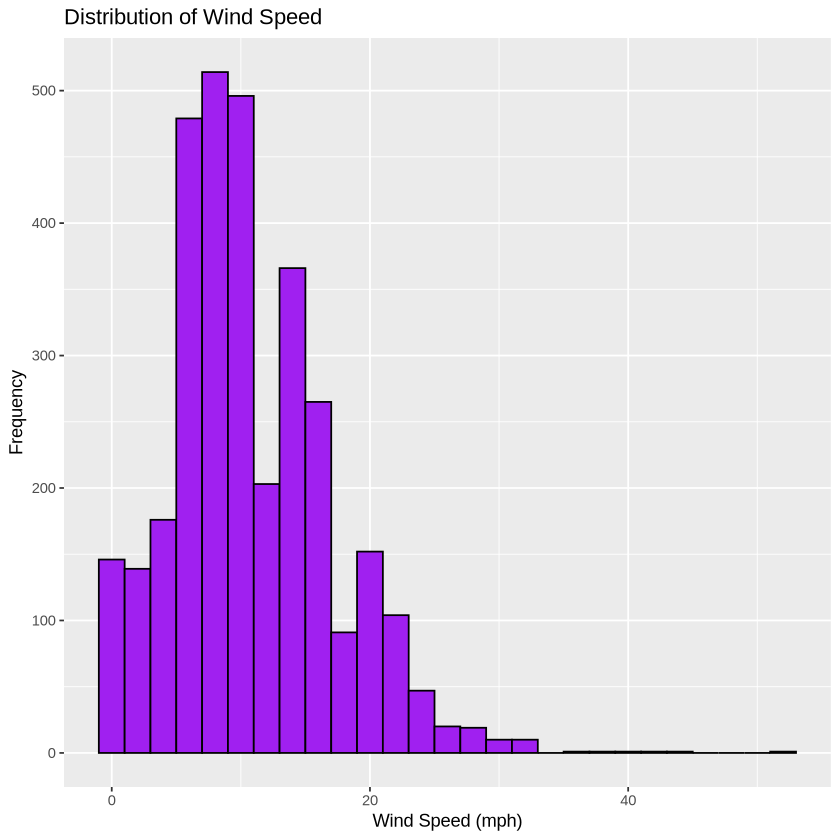

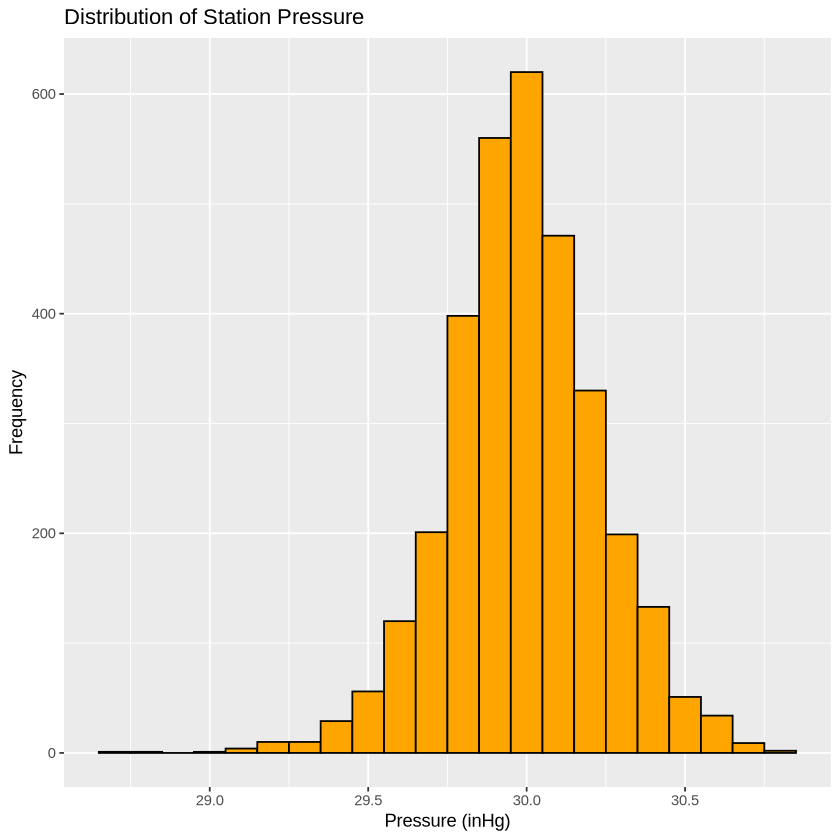

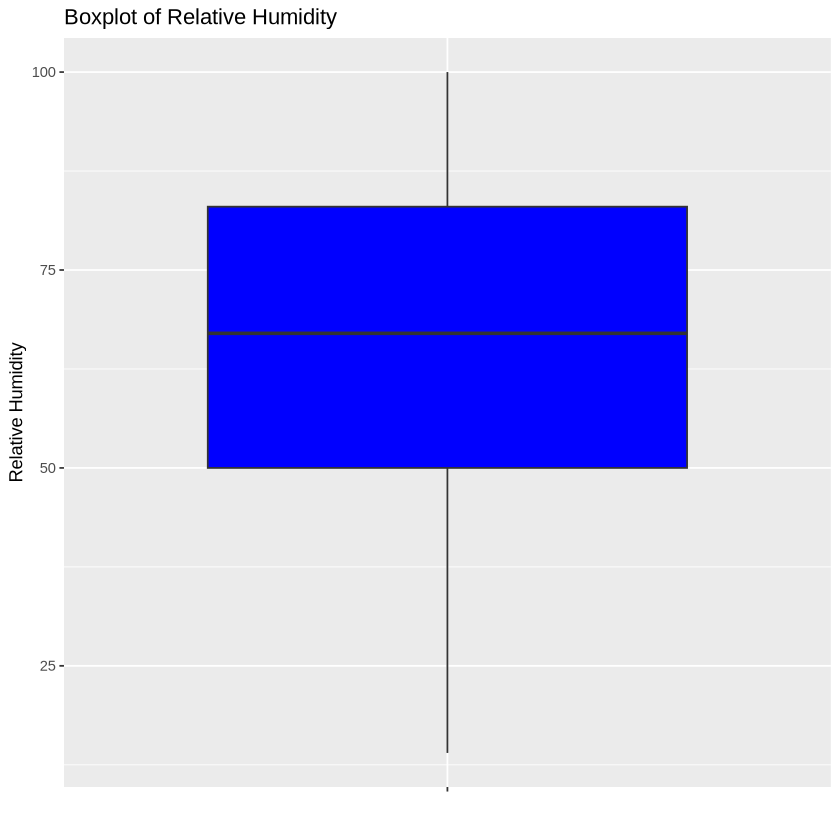

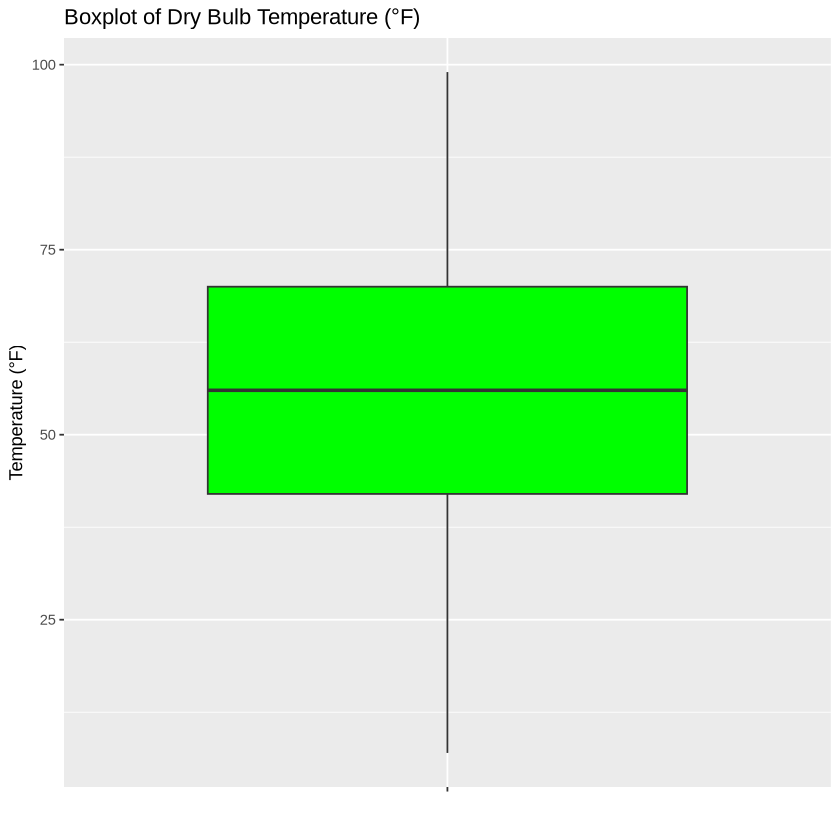

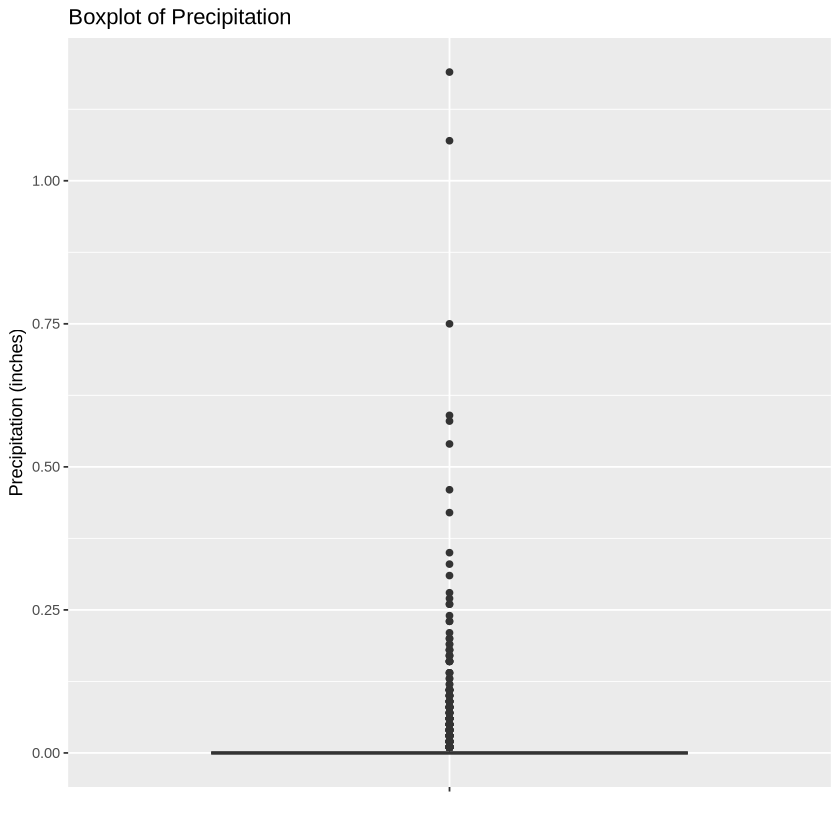

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


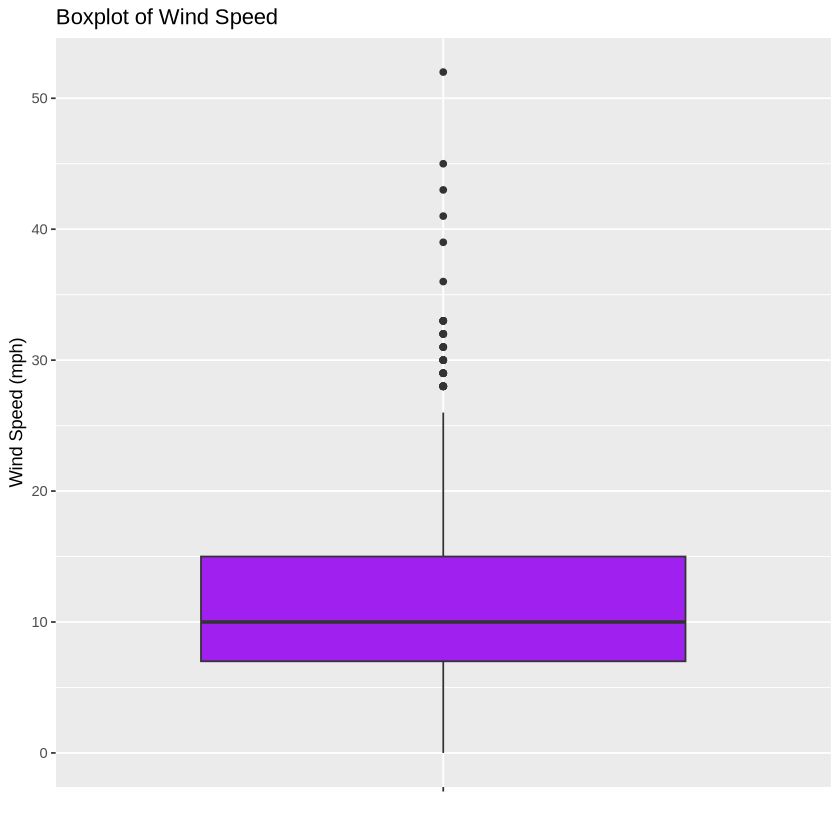

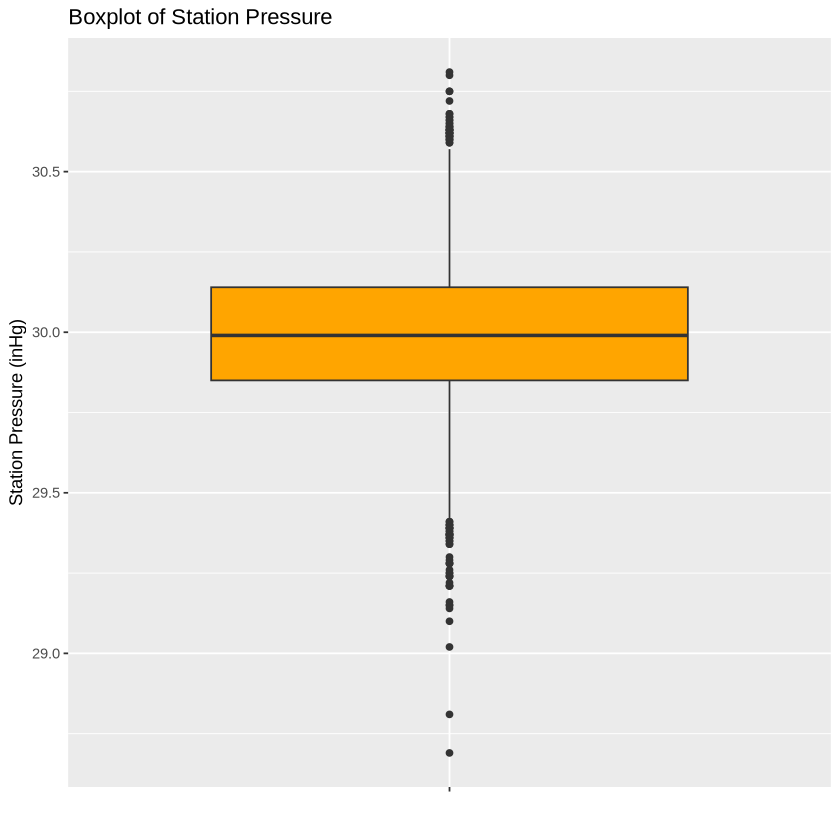

In [47]:
# Load the ggplot2 package
library(ggplot2)

# Create histograms for each variable in the training set
ggplot(train_data, aes(x = relative_humidity)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Distribution of Relative Humidity", x = "Relative Humidity", y = "Frequency")

ggplot(train_data, aes(x = dry_bulb_temp_f)) +
  geom_histogram(binwidth = 2, fill = "green", color = "black") +
  labs(title = "Distribution of Dry Bulb Temperature (°F)", x = "Temperature (°F)", y = "Frequency")

ggplot(train_data, aes(x = precip)) +
  geom_histogram(binwidth = 0.1, fill = "red", color = "black") +
  labs(title = "Distribution of Precipitation", x = "Precipitation (inches)", y = "Frequency")

ggplot(train_data, aes(x = wind_speed)) +
  geom_histogram(binwidth = 2, fill = "purple", color = "black") +
  labs(title = "Distribution of Wind Speed", x = "Wind Speed (mph)", y = "Frequency")

ggplot(train_data, aes(x = station_pressure)) +
  geom_histogram(binwidth = 0.1, fill = "orange", color = "black") +
  labs(title = "Distribution of Station Pressure", x = "Pressure (inHg)", y = "Frequency")

# Create box plots for each variable in the training set
ggplot(train_data, aes(x = "", y = relative_humidity)) +
  geom_boxplot(fill = "blue") +
  labs(title = "Boxplot of Relative Humidity", x = "", y = "Relative Humidity")

ggplot(train_data, aes(x = "", y = dry_bulb_temp_f)) +
  geom_boxplot(fill = "green") +
  labs(title = "Boxplot of Dry Bulb Temperature (°F)", x = "", y = "Temperature (°F)")

ggplot(train_data, aes(x = "", y = precip)) +
  geom_boxplot(fill = "red") +
  labs(title = "Boxplot of Precipitation", x = "", y = "Precipitation (inches)")

ggplot(train_data, aes(x = "", y = wind_speed)) +
  geom_boxplot(fill = "purple") +
  labs(title = "Boxplot of Wind Speed", x = "", y = "Wind Speed (mph)")

ggplot(train_data, aes(x = "", y = station_pressure)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Boxplot of Station Pressure", x = "", y = "Station Pressure (inHg)")

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.



Call:
lm(formula = precip ~ relative_humidity, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02086 -0.01171 -0.00506  0.00201  1.17080 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.073e-02  2.628e-03  -7.886 4.22e-15 ***
relative_humidity  4.158e-04  3.814e-05  10.902  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04333 on 3241 degrees of freedom
Multiple R-squared:  0.03537,	Adjusted R-squared:  0.03508 
F-statistic: 118.8 on 1 and 3241 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


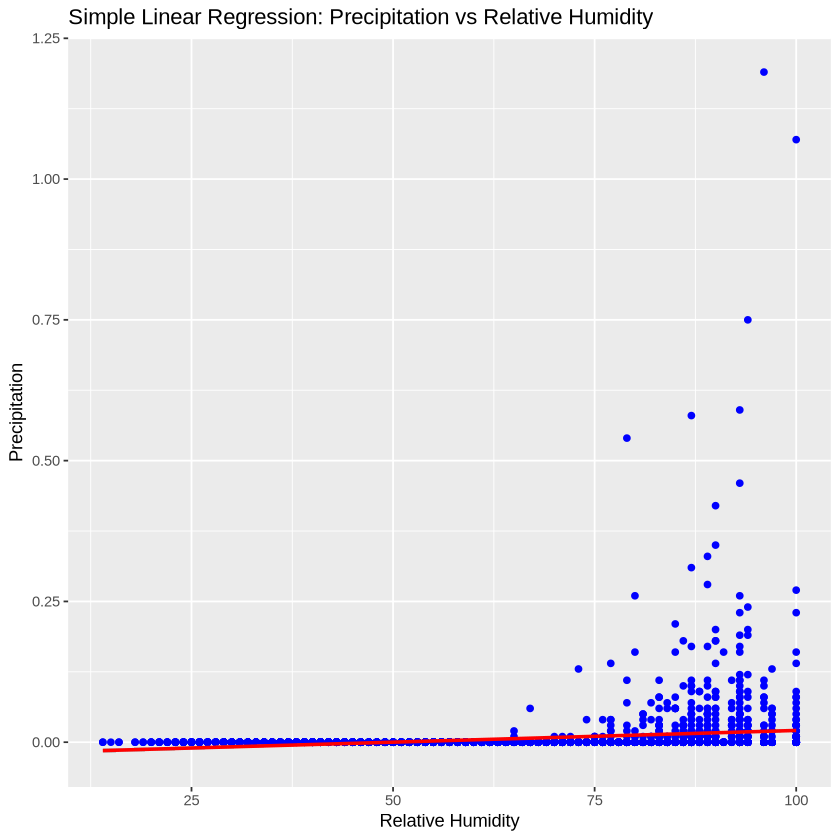

In [53]:
model_rh <- lm(precip ~ relative_humidity, data = train_data)
summary(model_rh)
# Scatter plot and regression line
ggplot(train_data, aes(x = relative_humidity, y = precip)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Simple Linear Regression: Precipitation vs Relative Humidity", 
       x = "Relative Humidity", y = "Precipitation")


Call:
lm(formula = precip ~ dry_bulb_temp_f, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00828 -0.00719 -0.00661 -0.00606  1.18285 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     4.673e-03  2.603e-03   1.795   0.0728 .
dry_bulb_temp_f 3.647e-05  4.477e-05   0.815   0.4153  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04411 on 3241 degrees of freedom
Multiple R-squared:  0.0002047,	Adjusted R-squared:  -0.0001037 
F-statistic: 0.6637 on 1 and 3241 DF,  p-value: 0.4153


`geom_smooth()` using formula = 'y ~ x'


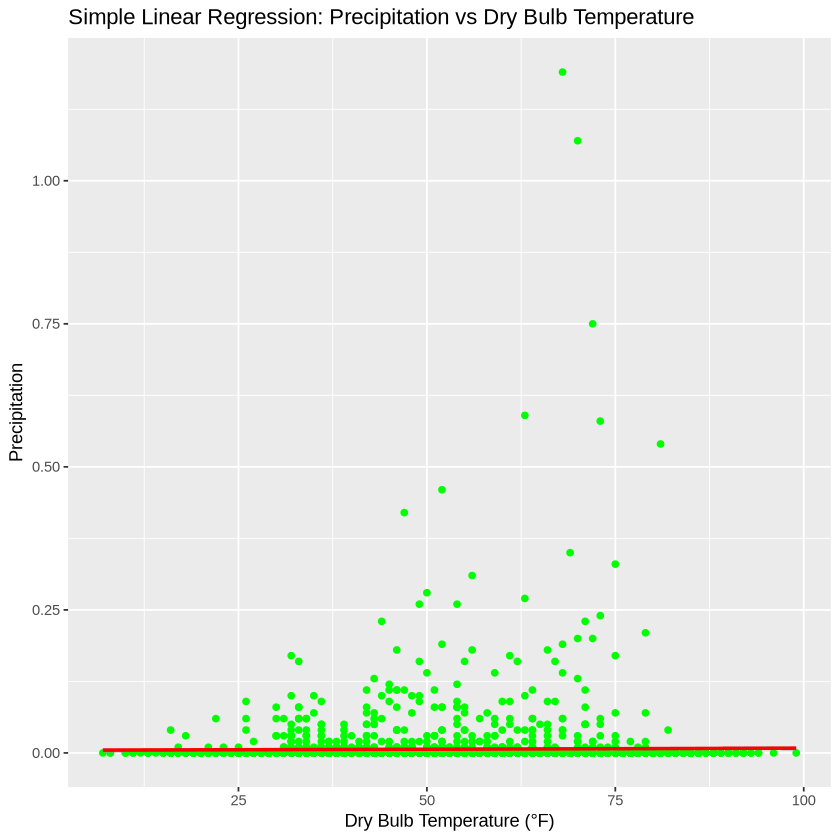

In [54]:
model_temp <- lm(precip ~ dry_bulb_temp_f, data = train_data)
summary(model_temp)
# Scatter plot and regression line
ggplot(train_data, aes(x = dry_bulb_temp_f, y = precip)) +
  geom_point(color = "green") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Simple Linear Regression: Precipitation vs Dry Bulb Temperature", 
       x = "Dry Bulb Temperature (°F)", y = "Precipitation")


Call:
lm(formula = precip ~ wind_speed, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03056 -0.00831 -0.00538 -0.00362  1.17701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0001071  0.0016018   0.067    0.947    
wind_speed  0.0005857  0.0001247   4.696 2.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04397 on 3241 degrees of freedom
Multiple R-squared:  0.006758,	Adjusted R-squared:  0.006452 
F-statistic: 22.05 on 1 and 3241 DF,  p-value: 2.764e-06


`geom_smooth()` using formula = 'y ~ x'


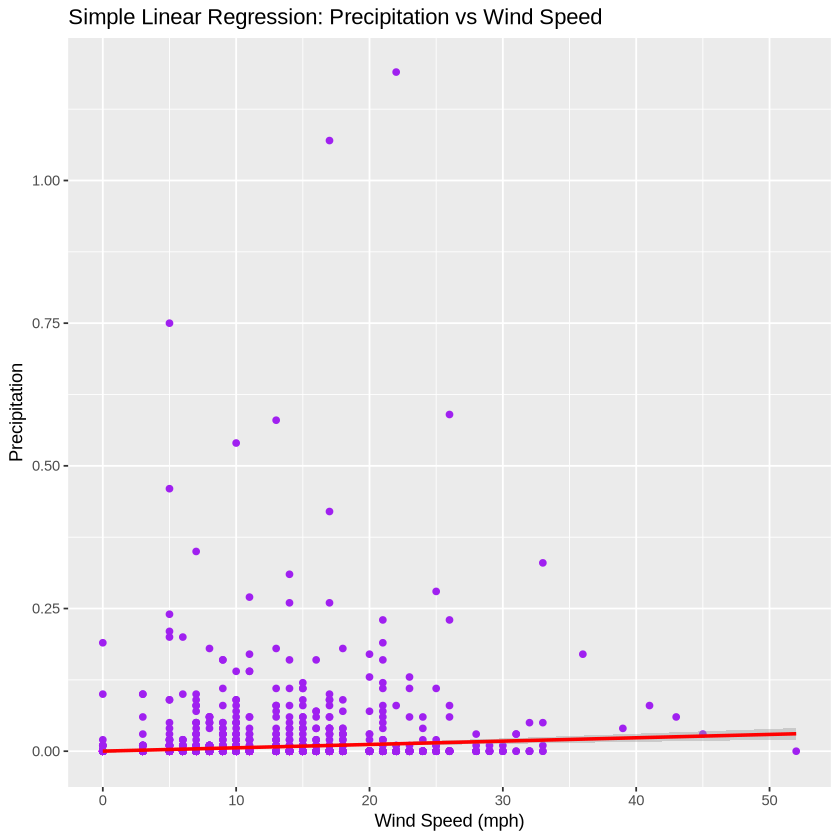

In [55]:
model_wind <- lm(precip ~ wind_speed, data = train_data)
summary(model_wind)
# Scatter plot and regression line
ggplot(train_data, aes(x = wind_speed, y = precip)) +
  geom_point(color = "purple") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Simple Linear Regression: Precipitation vs Wind Speed", 
       x = "Wind Speed (mph)", y = "Precipitation")


Call:
lm(formula = precip ~ station_pressure, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03746 -0.00940 -0.00586 -0.00161  1.17612 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.714075   0.096060   7.434 1.35e-13 ***
station_pressure -0.023584   0.003202  -7.364 2.25e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04377 on 3238 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.01647,	Adjusted R-squared:  0.01617 
F-statistic: 54.23 on 1 and 3238 DF,  p-value: 2.247e-13


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


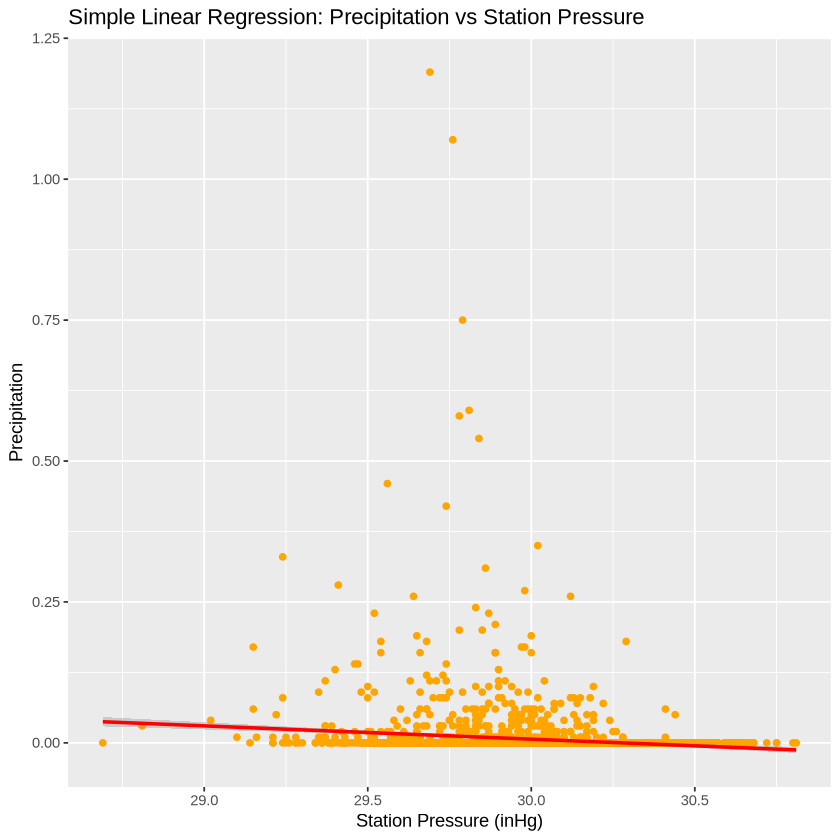

In [56]:
model_pressure <- lm(precip ~ station_pressure, data = train_data)
summary(model_pressure)
# Scatter plot and regression line
ggplot(train_data, aes(x = station_pressure, y = precip)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Simple Linear Regression: Precipitation vs Station Pressure", 
       x = "Station Pressure (inHg)", y = "Precipitation")

<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


In [65]:
# Create a linear regression model with multiple predictors
lm_model <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

# Fit the model
lm_fit <- lm_model %>%
  fit(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed, data = train_data)

# View the results
summary(lm_fit$fit)
# Lasso model (L1 regularization)
lasso_model <- linear_reg(penalty = 0.1, mixture = 1) %>%
  set_engine("glmnet") %>%
  set_mode("regression")

# Fit the Lasso model
lasso_fit <- lasso_model %>%
  fit(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed, data = train_data)

# View the results
lasso_fit
# Create a recipe to add polynomial terms for relative_humidity
recipe <- recipe(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed, data = train_data) %>%
  step_poly(relative_humidity, degree = 2)  # Add polynomial terms

# Create the model
lm_model_poly <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

# Create a workflow with recipe and model
workflow_poly <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(lm_model_poly)

# Fit the model
lm_fit_poly <- workflow_poly %>%
  fit(data = train_data)

# View the results
lm_fit_poly

train_preds <- predict(lm_fit, new_data = train_data)


Call:
stats::lm(formula = precip ~ relative_humidity + dry_bulb_temp_f + 
    wind_speed, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05454 -0.01124 -0.00464  0.00241  1.15810 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.785e-02  4.120e-03  -9.188  < 2e-16 ***
relative_humidity  4.811e-04  3.893e-05  12.358  < 2e-16 ***
dry_bulb_temp_f    3.711e-05  4.417e-05   0.840    0.401    
wind_speed         9.568e-04  1.263e-04   7.575 4.67e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04296 on 3239 degrees of freedom
Multiple R-squared:  0.05217,	Adjusted R-squared:  0.05129 
F-statistic: 59.43 on 3 and 3239 DF,  p-value: < 2.2e-16


parsnip model object


Call:  glmnet::glmnet(x = maybe_matrix(x), y = y, family = "gaussian",      alpha = ~1) 

   Df %Dev    Lambda
1   0 0.00 0.0082950
2   1 0.60 0.0075580
3   1 1.10 0.0068870
4   1 1.51 0.0062750
5   1 1.86 0.0057170
6   1 2.14 0.0052090
7   1 2.38 0.0047470
8   2 2.70 0.0043250
9   2 3.12 0.0039410
10  2 3.48 0.0035910
11  2 3.77 0.0032720
12  2 4.01 0.0029810
13  2 4.21 0.0027160
14  2 4.38 0.0024750
15  2 4.52 0.0022550
16  2 4.63 0.0020550
17  2 4.73 0.0018720
18  2 4.81 0.0017060
19  2 4.87 0.0015540
20  2 4.93 0.0014160
21  2 4.97 0.0012900
22  2 5.01 0.0011760
23  2 5.04 0.0010710
24  2 5.07 0.0009762
25  2 5.09 0.0008894
26  2 5.11 0.0008104
27  2 5.12 0.0007384
28  2 5.14 0.0006728
29  2 5.15 0.0006131
30  3 5.16 0.0005586
31  3 5.17 0.0005090
32  3 5.18 0.0004638
33  3 5.18 0.0004226
34  3 5.19 0.0003850
35  3 5.19 0.0003508
36  3 5.20 0.0003196
37  3 5.20 0.0002913
38  3 5.20 0.0002654
39  3 5.21 0.0002418
40  3 5.21 0.0002203
41  3 5.21 0.0002007
42  3

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_poly()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
             (Intercept)           dry_bulb_temp_f                wind_speed  
              -5.564e-03                 4.034e-05                 8.906e-04  
relative_humidity_poly_1  relative_humidity_poly_2  
               5.408e-01                 3.308e-01  


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [72]:
# 1. Get predictions on the testing data and ensure the .pred column exists
test_preds <- predict(lm_fit, new_data = test_data) %>%
  bind_cols(test_data) %>%
  rename(.pred = .pred)

# 2. Calculate RMSE on the test data
test_rmse <- rmse(test_preds, truth = precip, estimate = .pred)

# 3. Calculate R-squared on the test data
test_rsq <- rsq(test_preds, truth = precip, estimate = .pred)

# 4. Create a data frame for model comparison
model_names <- c("Linear Model")
test_rmse_value <- c(test_rmse$.estimate)
test_rsq_value <- c(test_rsq$.estimate)

# Create a comparison table
model_comparison <- tibble(
  model = model_names,
  RMSE = test_rmse_value,
  R_squared = test_rsq_value
)

# Print the model comparison table
print(model_comparison)


# A tibble: 1 × 3
  model          RMSE R_squared
  <chr>         <dbl>     <dbl>
1 Linear Model 0.0269    0.0624


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
